# Temperature of Black Body to its Color in RGB

In [1]:
from matplotlib import pyplot as plt
import numpy as np

### Reading Table from the file
Reference : https://stackoverflow.com/questions/37956344/reading-and-doing-calculation-from-dat-file-in-python (Answer by Bill)

In [2]:
datContent = [i.strip().split() for i in open("bbr_color.txt").readlines()]
data = datContent[19:-1]

### Extrating Content from Raw Data

In [3]:
R=[]
G=[]
B=[]
temp=[]

for i in range(0, len(data), 2):
    temp.append(float(data[i][0]))
    R.append(float(data[i][6]))
    G.append(float(data[i][7]))
    B.append(float(data[i][8]))   

### Finding a suitable polynomial which approx. fits the Temp-RGB relation
Reference : https://stackoverflow.com/questions/21977786/star-b-v-color-index-to-apparent-rgb-color (Answer by DocLeonard)

redsPoly =  [8.070262721346884e-43, -1.7822365249781715e-37, 1.698550943439023e-32, -9.129690304649708e-28, 3.0329097323270086e-23, -6.408747736872114e-19, 8.520955811618884e-15, -6.767795593255865e-11, 2.871116181869308e-07, -0.0005616004467246696, 1.3752268737109337]
greensPoly =  [9.41783374937086e-43, -2.0904603639676894e-37, 2.0046562200022528e-32, -1.0856465115272846e-27, 3.639668275215942e-23, -7.774218501050065e-19, 1.0453456993525022e-14, -8.342671794339795e-11, 3.390372713889161e-07, -0.00041373338121682504, 0.24265570846560314]
bluesPoly =  [6.3450498895169725e-43, -1.5016093567517676e-37, 1.54246935772314e-32, -9.002772829335035e-28, 3.280207151424187e-23, -7.709035443731048e-19, 1.1634007450620049e-14, -1.0807782765342989e-10, 5.555046305575244e-07, -0.0011690728742620394, 0.7935359432315083]


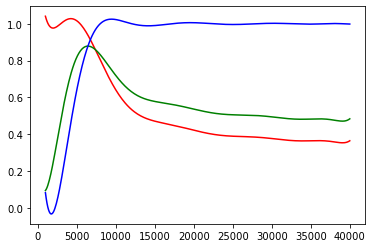

In [4]:
colors = [R,G,B]

def smoothListGaussian(myarray, degree=10):
    myarray = np.pad(myarray, (degree-1,degree-1), mode='edge')
    window=degree*2-1
    weight=np.arange(-degree+1, degree)/window
    weight = np.exp(-(16*weight**2))
    weight /= sum(weight)
    smoothed = np.convolve(myarray, weight, mode='valid')
    return smoothed

i=0
poly = []
for color in colors:

    color = smoothListGaussian(color)
    x = np.array(temp)
    y = np.array(color)
    
    names = ["reds","greens","blues"]
    z = np.polyfit(x, y, 10)
    f = np.poly1d(z)
    plt.plot(x,f(x),str(names[i][0]+"-"))
    print("%sPoly = " % names[i], list(z))
    poly.append(list(z))

    i += 1
plt.show()

### Using the polynomial to convert Temperature to RGB

In [5]:
redco = poly[0]
#redco = [8.070262721346884e-43, -1.7822365249781715e-37, 1.698550943439023e-32, -9.129690304649708e-28, 3.0329097323270086e-23, -6.408747736872114e-19, 8.520955811618884e-15, -6.767795593255865e-11, 2.871116181869308e-07, -0.0005616004467246696, 1.3752268737109337]

greenco = poly[1]
#greenco = [9.41783374937086e-43, -2.0904603639676894e-37, 2.0046562200022528e-32, -1.0856465115272846e-27, 3.639668275215942e-23, -7.774218501050065e-19, 1.0453456993525022e-14, -8.342671794339795e-11, 3.390372713889161e-07, -0.00041373338121682504, 0.24265570846560314]

blueco = poly[2]
#blueco = [6.3450498895169725e-43, -1.5016093567517676e-37, 1.54246935772314e-32, -9.002772829335035e-28, 3.280207151424187e-23, -7.709035443731048e-19, 1.1634007450620049e-14, -1.0807782765342989e-10, 5.555046305575244e-07, -0.0011690728742620394, 0.7935359432315083]

redco = np.poly1d(redco)
greenco = np.poly1d(greenco)
blueco = np.poly1d(blueco)

def temp2rgb(temp):
    red = redco(temp)
    green = greenco(temp)
    blue = blueco(temp)

    if red > 1:
        red = 1
    elif red < 0:
        red = 0
    if green > 1:
        green = 1
    elif green < 0:
        green = 0
    if blue > 1:
        blue = 1
    elif blue < 0:
        blue = 0

    color = (red, green, blue)
    return color

In [6]:
temp2rgb(4000)

(1, 0.6855671322539724, 0.3978175593803121)

## The End